**Zulkifli Yasin Hidayatulloh**

Belajar Pengembangan Machine Learning

Data yang digunakan: https://www.kaggle.com/viratkothari/animal10

**Persiapan Data**

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zulkifliyasin","key":"fc6fa59adff690439feb00d5ec4786c0"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
#download dataset
!kaggle datasets download -d viratkothari/animal10

 99% 580M/585M [00:06<00:00, 130MB/s]
100% 585M/585M [00:06<00:00, 97.1MB/s]


In [5]:
#unzip and save to dir
!mkdir animals
!unzip -qq animal10.zip -d animals
!ls animals

Animals-10


In [6]:
#melihat file yang telah di zip
import os
animals = os.path.join('/content/animals/Animals-10')
print(os.listdir(animals)) 

['cow', 'sheep', 'horse', 'butterfly', 'squirrel', 'chicken', 'spider', 'dog', 'elephant', 'cat']


In [7]:
#memasukan semua file dalam variabel file_animals
file_animals = ['cow', 'sheep', 'horse', 'butterfly', 'squirrel', 'chicken', 'spider', 'dog', 'elephant', 'cat']

In [8]:
#melihat banyaknya data dalam file
import glob
total = len(list(glob.iglob('/content/animals/Animals-10/*/*.*',recursive=True)))
print('Total gambar:',total)
for file in file_animals:
  dir = os.path.join(animals,file)
  jumlah = len(os.listdir(dir))
  print(file+ ':', jumlah)

Total gambar: 26179
cow: 1866
sheep: 1820
horse: 2623
butterfly: 2112
squirrel: 1862
chicken: 3098
spider: 4821
dog: 4863
elephant: 1446
cat: 1668


In [9]:
#memisahkan file yang digunakan dan tidak digunakan
import shutil
trash_file = ['cow', 'sheep', 'horse', 'butterfly', 'squirrel',  'elephant', 'cat']
for trash in trash_file:
  path = os.path.join(animals,trash)
  shutil.rmtree(path)
print(os.listdir(animals))

['chicken', 'spider', 'dog']


In [10]:
#memasukan semua file dalam variabel file_animals
file_animals = os.listdir(animals)

In [11]:
#melihat banyaknya data dalam file
import glob
total = len(list(glob.iglob('/content/animals/Animals-10/*/*.*',recursive=True)))
print('Total gambar:',total)
for file in file_animals:
  dir = os.path.join(animals,file)
  jumlah = len(os.listdir(dir))
  print(file+ ':', jumlah)

Total gambar: 12782
chicken: 3098
spider: 4821
dog: 4863


**Split Data**

In [12]:
!pip install split_folders

In [13]:
# mengcopy dan membagi data set menjadi train set (80%) dan validation set (20%)
import splitfolders
splitfolders.ratio('/content/animals/Animals-10','/content/data_set', seed=1337, ratio=(.8, .2))

Copying files: 12782 files [00:02, 5750.19 files/s]


In [14]:
# membuat direktori train dan validation
train_set = os.path.join('/content/data_set/train')
val_set = os.path.join('/content/data_set/val')

**Pemodelan Arsitektur**

In [15]:
# membuat objek image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 40,
    zoom_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode = 'nearest')

In [16]:
# membuat data latih
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size=(150,150),
    batch_size= 128,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_set,
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'categorical')

Found 10224 images belonging to 3 classes.
Found 2558 images belonging to 3 classes.


In [23]:
import tensorflow as tf

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)      

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\n Akurasi lebih dari 92%, hentikan training! ")
      self.model.stop_training = True

callbacks = myCallback()

In [25]:
history = model.fit(train_generator, 
                    epochs = 30, 
                    steps_per_epoch = train_generator.samples // 128,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // 128,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/30
79/79 [==============================] - 771s 10s/step - loss: 1.0713 - accuracy: 0.4001 - val_loss: 1.0713 - val_accuracy: 0.4268
Epoch 2/30
79/79 [==============================] - 764s 10s/step - loss: 0.9016 - accuracy: 0.5778 - val_loss: 0.7528 - val_accuracy: 0.6719
Epoch 3/30
79/79 [==============================] - 763s 10s/step - loss: 0.7131 - accuracy: 0.7019 - val_loss: 0.6384 - val_accuracy: 0.7471
Epoch 4/30
79/79 [==============================] - 762s 10s/step - loss: 0.6071 - accuracy: 0.7581 - val_loss: 0.5548 - val_accuracy: 0.7755
Epoch 5/30
79/79 [==============================] - 762s 10s/step - loss: 0.5574 - accuracy: 0.7837 - val_loss: 0.5123 - val_accuracy: 0.8059
Epoch 6/30
79/79 [==============================] - 761s 10s/step - loss: 0.5077 - accuracy: 0.8023 - val_loss: 0.4780 - val_accuracy: 0.8125
Epoch 7/30
79/79 [==============================] - 760s 10s/step - loss: 0.4648 - accuracy: 0.8211 - val_loss: 0.4118 - val_accuracy: 0.8384
Epoch 

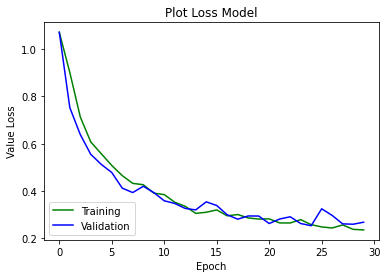

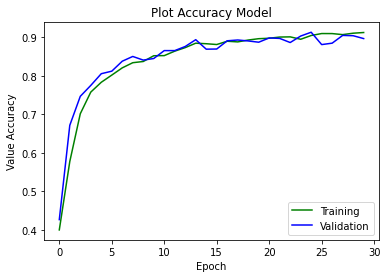

In [27]:
from matplotlib import pyplot as plt
#Plot Loss model
plt.plot(history.history['loss'], label='Training', color='green')
plt.plot(history.history['val_loss'], label='Validation', color='blue')
plt.title('Plot Loss Model')
plt.ylabel('Value Loss')
plt.xlabel('Epoch')
plt.legend(loc="lower left")
plt.show()

#Plot Accuracy model
plt.plot(history.history['accuracy'], label='Training', color='green')
plt.plot(history.history['val_accuracy'], label='Validation', color='blue')
plt.title('Plot Accuracy Model')
plt.ylabel('Value Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Menghilangkan Warning
import warnings
warnings.filterwarnings('ignore')

# Convert Model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with tf.io.gfile.GFile('animals_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3zt2jqzp/assets


In [31]:
!ls -la | grep 'animals_model'

-rw-r--r-- 1 root root  27987232 Jul  6 07:01 animals_model.tflite
